In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 1. Загрузим данные. Будем решать задачу классификации.

In [7]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [10]:
df = make_dataframe(load_wine)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### 2. Разделим выборку на обучающую и тестовую.

In [41]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

### 3. Посчитаем качество классификации  для трех моделей классификаторов: логистической регрессии, метода опорных векторов и дерева решений.

In [42]:
logreg = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier(max_depth=7)
clfs = {'Logictic Regression': logreg, 'SVC': svc, 'Decision Tree': dt}

In [43]:
print('{:>20} {:<10} {:<10}'.format('Model', 'Accuracy', 'f1'))
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
    print('{:>20} {:<10} {:<10}'.format(name, acc, f1))

               Model Accuracy   f1        
 Logictic Regression 0.815      0.813     
                 SVC 0.611      0.634     
       Decision Tree 0.852      0.85      


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 4. Нормализуем данные и снова посмотрим на качество моделей.

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
print('{:>20} {:<10} {:<10}'.format('Model', 'Accuracy', 'f1'))
for name, clf in clfs.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
    print('{:>20} {:<10} {:<10}'.format(name, acc, f1))

               Model Accuracy   f1        
 Logictic Regression 0.926      0.926     
                 SVC 0.963      0.964     
       Decision Tree 0.852      0.85      


#### На ненормализованных данных дерево решений показало лучший результат, на нормализованных метод опорных векторов.

### 5. Эксперименты с важностью признаков дерева решений.

In [48]:
from operator import itemgetter


def draw_feature_importances(tree_model, X_dataset, figsize=(15,7)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data


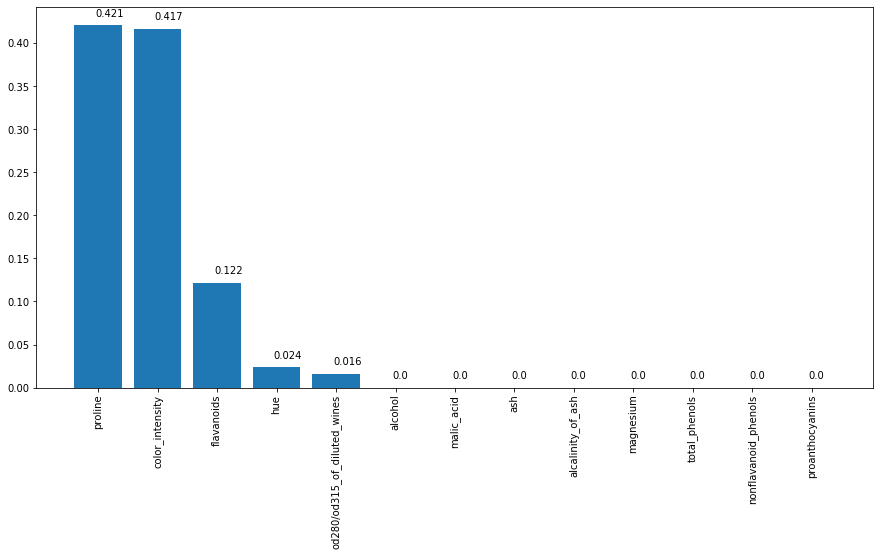

In [50]:
features, importance = draw_feature_importances(dt, X)

### Обучим дерево и предскажем результаты на топ-4 по важности признаках.

In [54]:
top_features = features[:4]
X_train_best = X_train[top_features]
X_test_best = X_test[top_features]

In [55]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train_best, y_train)
y_pred = dt.predict(X_test_best)

In [57]:
print('{:<20} {:<10} {:<10}'.format('Model', 'Accuracy', 'f1'))
acc = round(accuracy_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
print('{:<20} {:<10} {:<10}'.format(name, acc, f1))

Model                Accuracy   f1        
Decision Tree        0.87       0.872     


#### Качество даже улучшилось!

### Визуализируем дерево.

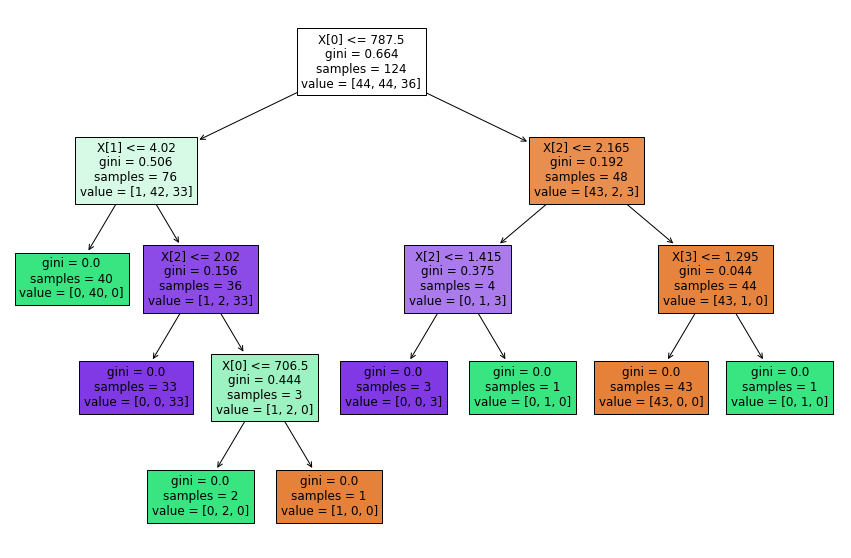

In [62]:
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True);